# Exploring the dataset

This notebook explores the dataset. The dataset was originally curated by [Stein et al,(2021)](https://arxiv.org/pdf/2110.13151).

In [7]:
from astroclip.utils import download_desi_dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import yaml

with open('../config.yaml', 'r') as file:
    config = yaml.safe_load(file)

cache_dir = config['general']['cache_dir']

print(config)

{'general': {'cache_dir': '/Users/adnansiddiquei/DocsLocal/AstroClip/astroclip/cache'}}


In [5]:
# This should load the dataset directly from cache/ as long as scripts/download_desi_dataset.py has been run first
# Otherwise, this will essentially just start downloading the data. It does exactly the same thing as the aforementioned script.

dataset = download_desi_dataset(cache_dir)

Loading dataset shards:   0%|          | 0/80 [00:00<?, ?it/s]

Loading dataset shards:   0%|          | 0/20 [00:00<?, ?it/s]

In [6]:
dataset

DatasetDict({
    train: Dataset({
        features: ['image', 'spectrum', 'redshift', 'targetid'],
        num_rows: 158377
    })
    test: Dataset({
        features: ['image', 'spectrum', 'redshift', 'targetid'],
        num_rows: 39599
    })
})

In [15]:
train_dataloader = DataLoader(dataset['train'], batch_size=256)
batch = next(iter(train_dataloader))

image = batch['image']
spectrum = batch['spectrum']
redshift = batch['redshift']

image.shape, spectrum.shape, redshift.shape

(torch.Size([256, 152, 152, 3]), torch.Size([256, 7781, 1]), torch.Size([256]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.032940466..0.78933114].


tensor(0.1718)


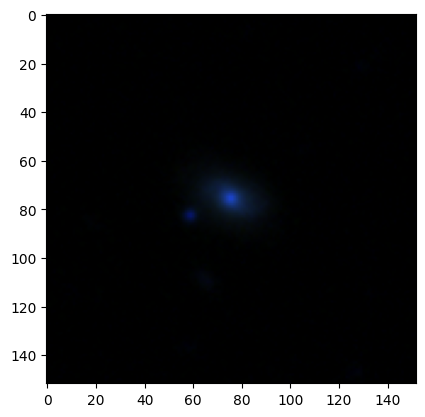

In [20]:
print(redshift[0])
plt.imshow(image[0])

[[<matplotlib.lines.Line2D at 0x3920e2870>],

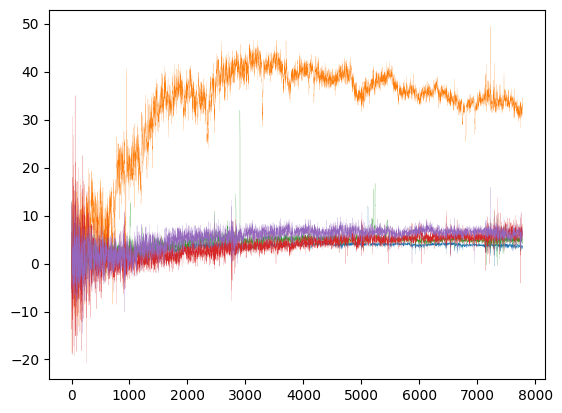

In [27]:
[plt.plot(spectrum[i], lw=0.1) for i in range(5)]

[[<matplotlib.lines.Line2D at 0x392165c10>],

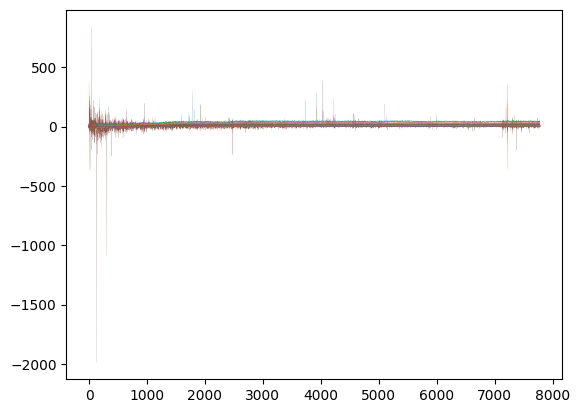

In [28]:
# if we plot everything in the batch we can see that there is quite a large range of values
[plt.plot(spectrum[i], lw=0.1) for i in range(256)]